In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# ANSWER
data = pd.read_csv('C:\\Users\\Owner\\Desktop\\Data Science labs\\Mini Project 2\\Data\\World_Cup_Matches.csv')
print(data)

     Year              Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                    Group 1   
1    1930  13 Jul 1930 - 15:00                    Group 4   
2    1930  14 Jul 1930 - 12:45                    Group 2   
3    1930  14 Jul 1930 - 14:50                    Group 3   
4    1930  15 Jul 1930 - 16:00                    Group 1   
..    ...                   ...                       ...   
847  2014  05 Jul 2014 - 17:00             Quarter-finals   
848  2014  08 Jul 2014 - 17:00                Semi-finals   
849  2014  09 Jul 2014 - 17:00                Semi-finals   
850  2014  12 Jul 2014 - 17:00   Play-off for third place   
851  2014  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
0                Pocitos      Montevideo          France                4   
1         Parque Central      Montevideo             USA                3   
2         Parque Central      Montev

In [3]:
data.shape

(852, 24)

In [4]:
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Half-time Home Goals,Half-time Away Goals,Half-time Difference,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,3,0,3,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,2,0,2,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,2,0,2,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,1,0,1,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [5]:
data.dtypes

Year                      int64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals           int64
Away Team Goals           int64
Score Difference          int64
Winner                   object
Home Team Won             int64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals      int64
Half-time Away Goals      int64
Half-time Difference      int64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                   int64
MatchID                   int64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [6]:
data.groupby("Stage")["Away Team Goals"].median()

Stage
Final                       1.0
First round                 1.0
Group 1                     1.0
Group 2                     0.0
Group 3                     0.5
Group 4                     1.0
Group 5                     1.0
Group 6                     1.0
Group A                     1.0
Group B                     1.0
Group C                     1.0
Group D                     1.0
Group E                     1.0
Group F                     1.0
Group G                     1.0
Group H                     1.0
Match for third place       1.0
Play-off for third place    3.0
Preliminary round           2.0
Quarter-finals              1.0
Round of 16                 1.0
Semi-finals                 1.0
Third place                 2.0
Name: Away Team Goals, dtype: float64

In [7]:
data.groupby("Stage")["Away Team Goals"].transform("median")

0      1.0
1      1.0
2      0.0
3      0.5
4      1.0
      ... 
847    1.0
848    1.0
849    1.0
850    3.0
851    1.0
Name: Away Team Goals, Length: 852, dtype: float64

In [8]:
data.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Score Difference        0
Winner                  0
Home Team Won           0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Half-time Difference    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [9]:
# ANSWER
feature_cols = ['Home Team Goals']
X = data[feature_cols]
Y = data['Home Team Won']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
# ANSWER
logreg = LogisticRegression()

In [12]:
# ANSWER
logreg.fit(X_train, Y_train)

LogisticRegression()

In [13]:
# ANSWER
logreg.fit(X_test, Y_test)

LogisticRegression()

In [14]:
logreg.coef_

array([[2.08996406]])

In [15]:
logreg.intercept_

array([-2.6505629])

[[1.99976196]] [-2.55966419]

[[9.28220087e-01 7.17799130e-02]
 [9.28220087e-01 7.17799130e-02]
 [9.28220087e-01 7.17799130e-02]
 [6.36429919e-01 3.63570081e-01]
 [1.91567073e-01 8.08432927e-01]
 [3.10798750e-02 9.68920125e-01]
 [4.32338598e-03 9.95676614e-01]
 [9.28220087e-01 7.17799130e-02]
 [9.28220087e-01 7.17799130e-02]
 [6.36429919e-01 3.63570081e-01]
 [9.28220087e-01 7.17799130e-02]
 [3.10798750e-02 9.68920125e-01]
 [6.36429919e-01 3.63570081e-01]
 [6.36429919e-01 3.63570081e-01]
 [9.28220087e-01 7.17799130e-02]
 [6.36429919e-01 3.63570081e-01]
 [3.10798750e-02 9.68920125e-01]
 [6.36429919e-01 3.63570081e-01]
 [3.10798750e-02 9.68920125e-01]
 [1.91567073e-01 8.08432927e-01]
 [4.32338598e-03 9.95676614e-01]
 [6.36429919e-01 3.63570081e-01]
 [1.91567073e-01 8.08432927e-01]
 [6.36429919e-01 3.63570081e-01]
 [6.36429919e-01 3.63570081e-01]
 [9.28220087e-01 7.17799130e-02]
 [6.36429919e-01 3.63570081e-01]
 [1.91567073e-01 8.08432927e-01]
 [7.95609543e-05 9.99920439e-01]
 [6.36429919e

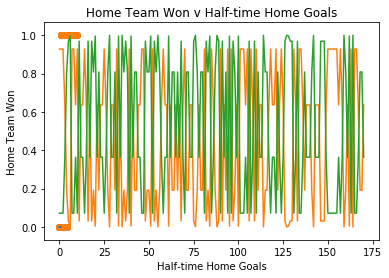

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X, Y)
plt.scatter(X, Y)
Xfit = np.linspace(0, 1, 50)
Yfit = logreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Half-time Home Goals')
plt.ylabel('Home Team Won')
plt.title ('Home Team Won v Half-time Home Goals')
plt.plot(Xfit, Yfit, label = 'Home Team Won v Half-time Home Goals');
print(logreg.coef_, logreg.intercept_)
print()
print(logreg.predict_proba(X_test))
plt.plot(logreg.predict_proba(X_test))

In [22]:
# ANSWER
print(set(zip(feature_cols, logreg.coef_[0])))

{('Half-time Home Goals', 0.3108869038969026), ('Home Team Goals', 1.8124785763533218)}


In [23]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Half-time Home Goals  +0.310887
Home Team Goals  +1.812479


In [24]:
print('accuracy= {:7.4f}'.format(logreg.score(X_test, Y_test)))

accuracy=  0.8187


In [25]:
#Imputation of attendance as it is the oly variable with missing values.
data['Attendance'].fillna(data.Attendance.mean(), inplace=True)
feature_cols = ['Home Team Goals', 'Half-time Home Goals', 'Attendance']
X = data[feature_cols]

In [26]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.8150


In [27]:
# ANSWER
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_class))

[[59  8]
 [23 81]]


In [28]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


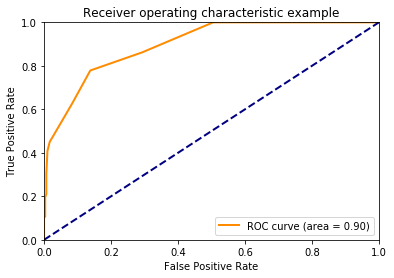

In [29]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

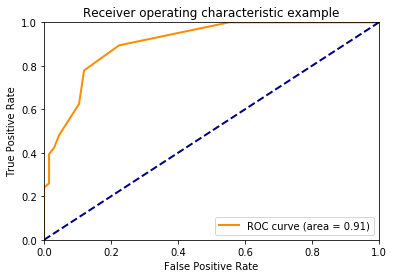

In [30]:
plot_roc_curve(X_test, Y_test)

In [31]:
data_with_dummies = pd.get_dummies(data = data, columns = ['Stadium', 'City', 'Referee'], 
                                      prefix = ['Stadium', 'City', 'Referee'])
data_with_dummies.head()

,Year,Datetime,Stage,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,Home Team Won,Away Team Name,...,Referee_WINSEMANN Werner (CAN),Referee_WOEHRER Franz (AUT),Referee_WOJCIK Ryszard (POL),Referee_WUETHRICH Hans (SUI),Referee_WURTZ Robert (FRA),Referee_WYSSLING Paul (SUI),Referee_Wolfgang STARK (GER),Referee_YAMASAKI MALDONADO Arturo (MEX),Referee_ZECEVIC Konstantin (YUG),Referee_ZSOLT Istvan (HUN)
0,1930,13 Jul 1930 - 15:00,Group 1,France,4,1,3,France,1,Mexico,...,0,0,0,0,0,0,0,0,0,0
1,1930,13 Jul 1930 - 15:00,Group 4,USA,3,0,3,USA,1,Belgium,...,0,0,0,0,0,0,0,0,0,0
2,1930,14 Jul 1930 - 12:45,Group 2,Yugoslavia,2,1,1,Yugoslavia,1,Brazil,...,0,0,0,0,0,0,0,0,0,0
3,1930,14 Jul 1930 - 14:50,Group 3,Romania,3,1,2,Romania,1,Peru,...,0,0,0,0,0,0,0,0,0,0
4,1930,15 Jul 1930 - 16:00,Group 1,Argentina,1,0,1,Argentina,1,France,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data_with_dummies['Attendance'].value_counts()

43000.0    13
45000.0    13
52000.0    11
65000.0     9
25000.0     8
           ..
60000.0     1
17400.0     1
74624.0     1
13000.0     1
2000.0      1
Name: Attendance, Length: 623, dtype: int64

In [33]:
def get_logreg_score(data, feature_cols, target_col):
    X = data[feature_cols]
    y = data[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Return accuracy rate
    return logreg_score

In [34]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.8150


In [35]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_test, Y_test)
# Score
logreg_score = logreg.score(X_test, Y_test)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.8187


In [36]:
# ANSWER 
target_col = 'Home Team Won'
feature_cols = ['Home Team Goals','Half-time Home Goals' , 'Attendance']
get_logreg_score(data_with_dummies, feature_cols, target_col)

0.7323943661971831

In [37]:
# ANSWER
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

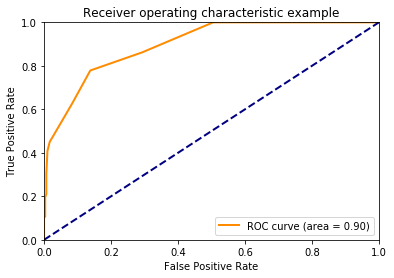

In [38]:
plot_roc_curve(X_train, Y_train)

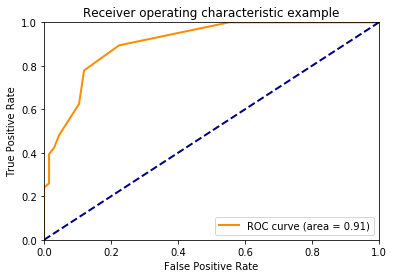

In [39]:
plot_roc_curve(X_test, Y_test)

In [40]:
# ANSWER 
target_col = 'Home Team Won'
feature_cols = ['Home Team Goals', 'Half-time Difference','Half-time Home Goals' , 'Score Difference', 'Attendance']
get_logreg_score(data_with_dummies, feature_cols, target_col)

1.0

In [41]:
def get_logreg_score(data, feature_cols, target_col):
    X = data[feature_cols]
    y = data[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Return accuracy rate
    return logreg_score

In [42]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print(get_logreg_score(data, feature_cols, target_col))
print('accuracy = {:1.4f}'.format(logreg_score))

1.0
accuracy = 0.8150


In [43]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_test, Y_test)
# Score
logreg_score = logreg.score(X_test, Y_test)
print(get_logreg_score(data, feature_cols, target_col))
print('accuracy = {:1.4f}'.format(logreg_score))

1.0
accuracy = 0.8187


In [44]:
# ANSWER
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

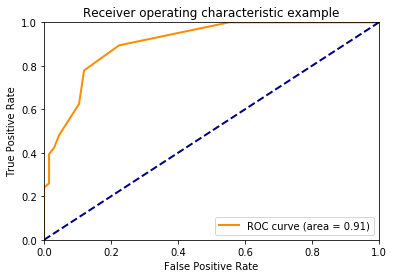

In [45]:
plot_roc_curve(X_test, Y_test)

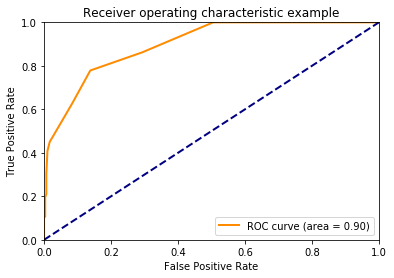

In [46]:
plot_roc_curve(X_train, Y_train)

In [66]:
import pandas as pd
import numpy as np

In [67]:
# ANSWER
data = pd.read_csv('C:\\Users\\Owner\\Desktop\\Data Science labs\\Mini Project 2\\Data\\World_Cup_Matches.csv')
print(data)

     Year              Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                    Group 1   
1    1930  13 Jul 1930 - 15:00                    Group 4   
2    1930  14 Jul 1930 - 12:45                    Group 2   
3    1930  14 Jul 1930 - 14:50                    Group 3   
4    1930  15 Jul 1930 - 16:00                    Group 1   
..    ...                   ...                       ...   
847  2014  05 Jul 2014 - 17:00             Quarter-finals   
848  2014  08 Jul 2014 - 17:00                Semi-finals   
849  2014  09 Jul 2014 - 17:00                Semi-finals   
850  2014  12 Jul 2014 - 17:00   Play-off for third place   
851  2014  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
0                Pocitos      Montevideo          France                4   
1         Parque Central      Montevideo             USA                3   
2         Parque Central      Montev

In [68]:
data.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Half-time Home Goals,Half-time Away Goals,Half-time Difference,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,3,0,3,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,2,0,2,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,2,0,2,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,1,0,1,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,3,Chile,...,1,0,1,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,4,Yugoslavia,...,0,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201,1092,YUG,BOL
7,1930,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,2,0,2,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201,1097,USA,PAR
8,1930,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,1,Uruguay,...,0,0,0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201,1099,URU,PER
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,1,Chile,...,0,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201,1094,CHI,FRA


In [69]:
data["Stadium"].value_counts()

Estadio Azteca             19
Jalisco                    14
Olympiastadion             14
Nou Camp - Estadio Le�n    11
Estadio Centenario         10
                           ..
Velodrome Municipale        1
White City                  1
Rimnersvallen               1
Comunale di Cornaredo       1
Friuli                      1
Name: Stadium, Length: 181, dtype: int64

In [70]:
data["Stadium"]=data["Stadium"].astype('category')
data.dtypes

Year                       int64
Datetime                  object
Stage                     object
Stadium                 category
City                      object
Home Team Name            object
Home Team Goals            int64
Away Team Goals            int64
Score Difference           int64
Winner                    object
Home Team Won              int64
Away Team Name            object
Win conditions            object
Attendance               float64
Half-time Home Goals       int64
Half-time Away Goals       int64
Half-time Difference       int64
Referee                   object
Assistant 1               object
Assistant 2               object
RoundID                    int64
MatchID                    int64
Home Team Initials        object
Away Team Initials        object
dtype: object

In [71]:
data["Stadium_coded"] = data["Stadium"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Half-time Away Goals,Half-time Difference,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Stadium_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,0,3,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,124
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,0,2,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,122
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,0,2,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,122
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,0,1,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,124
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,122


In [72]:
data["Stadium"].value_counts()

Estadio Azteca             19
Jalisco                    14
Olympiastadion             14
Nou Camp - Estadio Le�n    11
Estadio Centenario         10
                           ..
Cavee Verte                 1
Rimnersvallen               1
Stade de la Meinau          1
Comunale di Cornaredo       1
White City                  1
Name: Stadium, Length: 181, dtype: int64

In [73]:
data["Stadium_coded"].value_counts()

32     19
78     14
116    14
110    11
35     10
       ..
16      1
133     1
159     1
20      1
179     1
Name: Stadium_coded, Length: 181, dtype: int64

In [74]:
data["Datetime"] = data["Datetime"].astype('category')
data.dtypes
data["Datetime_coded"] = data["Datetime"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Half-time Difference,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Stadium_coded,Datetime_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,3,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,124,204
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,2,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,122,204
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,2,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,122,230
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,1,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,124,231
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,122,258


In [75]:
data["Stage"] = data["Stage"].astype('category')
data.dtypes
data["Stage_coded"] = data["Stage"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Stadium_coded,Datetime_coded,Stage_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,124,204,2
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,122,204,5
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,122,230,3
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,124,231,4
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,122,258,2


In [76]:
data["City"] = data["City"].astype('category')
data.dtypes
data["City_coded"] = data["City"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Stadium_coded,Datetime_coded,Stage_coded,City_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,124,204,2,83
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,122,204,5,83
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,122,230,3,83
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,124,231,4,83
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,122,258,2,83


In [77]:
data["Home Team Name"] = data["Home Team Name"].astype('category')
data.dtypes
data["Home Team Name_coded"] = data["Home Team Name"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Stadium_coded,Datetime_coded,Stage_coded,City_coded,Home Team Name_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,REGO Gilberto (BRA),201,1096,FRA,MEX,124,204,2,83,23
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,WARNKEN Alberto (CHI),201,1090,USA,BEL,122,204,5,83,67
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,BALWAY Thomas (FRA),201,1093,YUG,BRA,122,230,3,83,71
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,MATEUCCI Francisco (URU),201,1098,ROU,PER,124,231,4,83,51
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,RADULESCU Constantin (ROU),201,1085,ARG,FRA,122,258,2,83,2


In [78]:
data["Winner"] = data["Winner"].astype('category')
data.dtypes
data["Winner_coded"] = data["Winner"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,RoundID,MatchID,Home Team Initials,Away Team Initials,Stadium_coded,Datetime_coded,Stage_coded,City_coded,Home Team Name_coded,Winner_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,201,1096,FRA,MEX,124,204,2,83,23,22
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,201,1090,USA,BEL,122,204,5,83,67,65
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,201,1093,YUG,BRA,122,230,3,83,71,69
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,201,1098,ROU,PER,124,231,4,83,51,50
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,201,1085,ARG,FRA,122,258,2,83,2,2


In [79]:
data["Away Team Name"] = data["Away Team Name"].astype('category')
data.dtypes
data["Away Team Name_coded"] = data["Away Team Name"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,MatchID,Home Team Initials,Away Team Initials,Stadium_coded,Datetime_coded,Stage_coded,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,1096,FRA,MEX,124,204,2,83,23,22,45
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,1090,USA,BEL,122,204,5,83,67,65,5
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,1093,YUG,BRA,122,230,3,83,71,69,7
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,1098,ROU,PER,124,231,4,83,51,50,53
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,1085,ARG,FRA,122,258,2,83,2,2,26


In [80]:
data["Win conditions"] = data["Win conditions"].astype('category')
data.dtypes
data["Win conditions_coded"] = data["Win conditions"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Home Team Initials,Away Team Initials,Stadium_coded,Datetime_coded,Stage_coded,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,FRA,MEX,124,204,2,83,23,22,45,0
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,USA,BEL,122,204,5,83,67,65,5,0
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,YUG,BRA,122,230,3,83,71,69,7,0
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,ROU,PER,124,231,4,83,51,50,53,0
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,ARG,FRA,122,258,2,83,2,2,26,0


In [81]:
data["Referee"] = data["Referee"].astype('category')
data.dtypes
data["Referees_coded"] = data["Referee"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Away Team Initials,Stadium_coded,Datetime_coded,Stage_coded,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded,Referees_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,MEX,124,204,2,83,23,22,45,0,191
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,BEL,122,204,5,83,67,65,5,0,199
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,BRA,122,230,3,83,71,69,7,0,325
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,PER,124,231,4,83,51,50,53,0,351
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,FRA,122,258,2,83,2,2,26,0,277


In [82]:
data["Assistant 1"] = data["Assistant 1"].astype('category')
data.dtypes
data["Assistant 1_coded"] = data["Assistant 1"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Stadium_coded,Datetime_coded,Stage_coded,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded,Referees_coded,Assistant 1_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,124,204,2,83,23,22,45,0,191,86
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,122,204,5,83,67,65,5,0,199,239
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,122,230,3,83,71,69,7,0,325,354
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,124,231,4,83,51,50,53,0,351,203
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,122,258,2,83,2,2,26,0,277,313


In [83]:
data["Assistant 2"] = data["Assistant 2"].astype('category')
data.dtypes
data["Assistant 2_coded"] = data["Assistant 2"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Datetime_coded,Stage_coded,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded,Referees_coded,Assistant 1_coded,Assistant 2_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,204,2,83,23,22,45,0,191,86,291
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,204,5,83,67,65,5,0,199,239,388
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,230,3,83,71,69,7,0,325,354,34
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,231,4,83,51,50,53,0,351,203,228
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,258,2,83,2,2,26,0,277,313,285


In [84]:
data["Home Team Initials"] = data["Home Team Initials"].astype('category')
data.dtypes
data["Home Team Initials_coded"] = data["Home Team Initials"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,Stage_coded,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded,Referees_coded,Assistant 1_coded,Assistant 2_coded,Home Team Initials_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,2,83,23,22,45,0,191,86,291,24
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,5,83,67,65,5,0,199,239,388,73
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,3,83,71,69,7,0,325,354,34,75
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,4,83,51,50,53,0,351,203,228,53
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,2,83,2,2,26,0,277,313,285,2


In [85]:
data["Away Team Initials"] = data["Away Team Initials"].astype('category')
data.dtypes
data["Away Team Initials_coded"] = data["Away Team Initials"].cat.codes
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Score Difference,Winner,...,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded,Referees_coded,Assistant 1_coded,Assistant 2_coded,Home Team Initials_coded,Away Team Initials_coded
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,3,France,...,83,23,22,45,0,191,86,291,24,46
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,USA,...,83,67,65,5,0,199,239,388,73,5
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,1,Yugoslavia,...,83,71,69,7,0,325,354,34,75,8
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,2,Romania,...,83,51,50,53,0,351,203,228,53,53
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,1,Argentina,...,83,2,2,26,0,277,313,285,2,25


In [86]:
data.drop(['Datetime','Stage', 'Stadium', 'City', 'Home Team Name', 'Winner', 'Away Team Name', 'Win conditions', 'Referee', 'Assistant 1', 'Assistant 2', 'Home Team Initials', 'Away Team Initials'], axis=1, inplace=True)

In [87]:
data.head()

,Year,Home Team Goals,Away Team Goals,Score Difference,Home Team Won,Attendance,Half-time Home Goals,Half-time Away Goals,Half-time Difference,RoundID,...,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded,Referees_coded,Assistant 1_coded,Assistant 2_coded,Home Team Initials_coded,Away Team Initials_coded
0,1930,4,1,3,1,4444.0,3,0,3,201,...,83,23,22,45,0,191,86,291,24,46
1,1930,3,0,3,1,18346.0,2,0,2,201,...,83,67,65,5,0,199,239,388,73,5
2,1930,2,1,1,1,24059.0,2,0,2,201,...,83,71,69,7,0,325,354,34,75,8
3,1930,3,1,2,1,2549.0,1,0,1,201,...,83,51,50,53,0,351,203,228,53,53
4,1930,1,0,1,1,23409.0,0,0,0,201,...,83,2,2,26,0,277,313,285,2,25


In [88]:
y = data['Home Team Won']

In [89]:
y

0      1
1      1
2      1
3      1
4      1
      ..
847    0
848    0
849    0
850    0
851    1
Name: Home Team Won, Length: 852, dtype: int64

In [97]:
x = data.drop(['Attendance'],axis=1)

In [98]:
x.head()

,Year,Home Team Goals,Away Team Goals,Score Difference,Home Team Won,Half-time Home Goals,Half-time Away Goals,Half-time Difference,RoundID,MatchID,...,City_coded,Home Team Name_coded,Winner_coded,Away Team Name_coded,Win conditions_coded,Referees_coded,Assistant 1_coded,Assistant 2_coded,Home Team Initials_coded,Away Team Initials_coded
0,1930,4,1,3,1,3,0,3,201,1096,...,83,23,22,45,0,191,86,291,24,46
1,1930,3,0,3,1,2,0,2,201,1090,...,83,67,65,5,0,199,239,388,73,5
2,1930,2,1,1,1,2,0,2,201,1093,...,83,71,69,7,0,325,354,34,75,8
3,1930,3,1,2,1,1,0,1,201,1098,...,83,51,50,53,0,351,203,228,53,53
4,1930,1,0,1,1,0,0,0,201,1085,...,83,2,2,26,0,277,313,285,2,25


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
oversample = SMOTE()

In [103]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [104]:
np.bincount(y)

array([364, 488], dtype=int64)

In [105]:
logreg = LogisticRegression(multi_class='ovr',max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [106]:
#logreg.coef_
y_pred = logreg.predict(X_test)

In [107]:
print('accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))

accuracy =  0.5000


In [108]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 98   0]
 [115   0]]


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1','Class 2']))


Accuracy: 0.46

Micro Precision: 0.46
Micro Recall: 0.46
Micro F1-score: 0.46

Macro Precision: 0.23
Macro Recall: 0.50
Macro F1-score: 0.32

Weighted Precision: 0.21
Weighted Recall: 0.46
Weighted F1-score: 0.29

Classification Report

              precision    recall  f1-score   support

     Class 1       0.46      1.00      0.63        98
     Class 2       0.00      0.00      0.00       115

    accuracy                           0.46       213
   macro avg       0.23      0.50      0.32       213
weighted avg       0.21      0.46      0.29       213



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from sklearn.svm import SVC
model = SVC(decision_function_shape='ovo',probability=True)
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1]


In [111]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[37 61]
 [28 87]]


In [112]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.58
Macro Recall: 0.57
Macro F1-score: 0.56

Weighted Precision: 0.58
Weighted Recall: 0.58
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

     Class 1       0.57      0.38      0.45        98
     Class 2       0.59      0.76      0.66       115

    accuracy                           0.58       213
   macro avg       0.58      0.57      0.56       213
weighted avg       0.58      0.58      0.57       213



In [113]:
# preds.shape
# model.predict_proba(X_train).shape
y_train.shape

(746,)

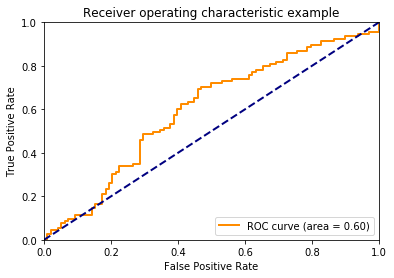

In [114]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

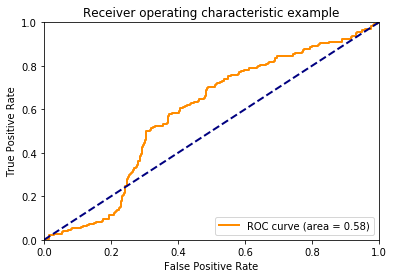

In [115]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [116]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1]


In [117]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[37 61]
 [28 87]]


In [118]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.58
Macro Recall: 0.57
Macro F1-score: 0.56

Weighted Precision: 0.58
Weighted Recall: 0.58
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

     Class 1       0.57      0.38      0.45        98
     Class 2       0.59      0.76      0.66       115

    accuracy                           0.58       213
   macro avg       0.58      0.57      0.56       213
weighted avg       0.58      0.58      0.57       213

